In [1]:
# i switched to google colab and checking if Nvidia GPU is working
!nvidia-smi

Thu Nov 27 00:22:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install Dependencies

In [2]:
!pip install -q gdown inference-gpu supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 9.5

In [3]:
# accesing directories
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("drive/MyDrive/soccer_video_to_data/03 Data")
os.getcwd()

'/content/drive/MyDrive/soccer_video_to_data/03 Data'

In [ ]:
# this was when i was running it locally

#import os
#os.getcwd()
#os.chdir("../03 Data")

In [5]:
DATA_dir = os.getcwd()
print(DATA_dir)

/content/drive/MyDrive/soccer_video_to_data/03 Data


In [6]:
pip install git+https://github.com/roboflow/sports.git

  Cloning https://github.com/roboflow/sports.git to /tmp/pip-req-build-buo2soe4
  Running command git clone --filter=blob:none --quiet https://github.com/roboflow/sports.git /tmp/pip-req-build-buo2soe4
  Resolved https://github.com/roboflow/sports.git to commit 42c80c06b6b65a7f89455b89fe31cdf4c38ba227
  Preparing metadata (setup.py) ... done
  Created wheel for sports: filename=sports-0.1.0-py3-none-any.whl size=10881 sha256=0e9577550fd2b0e528725a8aee39cb760d1d5f295d9fc47f40385052a66fe832
  Stored in directory: /tmp/pip-ephem-wheel-cache-ldbzne4n/wheels/6f/53/b4/9ae665e952091404183bcf40f7662061b8d46a5eb80ae595da
Successfully built sports


In [ ]:
# download the videos for demos
#!gdown -O "{DATA_dir}/0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
#!gdown -O "{DATA_dir}/2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
#!gdown -O "{DATA_dir}/08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
#!gdown -O "{DATA_dir}/573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
#!gdown -O "{DATA_dir}/121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

In [7]:
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

## Ball, Players, Goalkeepers, and Referees detection


In [8]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get("ROBOFLOW_API_KEY")
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/20"
PLAYER_DETECTION_MODEL = get_model(
    model_id=PLAYER_DETECTION_MODEL_ID,
    api_key=ROBOFLOW_API_KEY
)

ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM3 model. Install SAM3 dependencies and set CORE_MODEL_SAM3_ENABLED to True.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support GroundingDINO model. Use pip install 'inference[grounding-dino]' to install missing requirements.To suppress this warning, set CO

In [ ]:
# This is the local version.

#from inference import get_model
#from dotenv import load_dotenv

#load_dotenv()
#ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")
#PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/20"
#PLAYER_DETECTION_MODEL = get_model(
#    model_id=PLAYER_DETECTION_MODEL_ID,
#    api_key=ROBOFLOW_API_KEY
#)

In [9]:
from tqdm import tqdm

STRIDE = 30
PLAYER_ID = 2

def extract_crops(source_video_path: str):
    frame_generator = sv.get_video_frames_generator(source_video_path, stride=STRIDE)

    crops=[]
    for frame in tqdm(frame_generator, desc='collecting crops'):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)
        detections = detections.with_nms(threshold=0.5, class_agnostic=True)
        detections = detections[detections.class_id== PLAYER_ID]
        crops += [
            sv.crop_image(frame, xyxy)
            for xyxy
            in detections.xyxy
        ]
    return crops

In [10]:
import supervision as sv
SOURCE_VIDEO_PATH = f"{DATA_dir}/121364_0.mp4"

In [11]:
crops = extract_crops(SOURCE_VIDEO_PATH)

collecting crops: 25it [00:18,  1.33it/s]


In [12]:
len(crops)

501

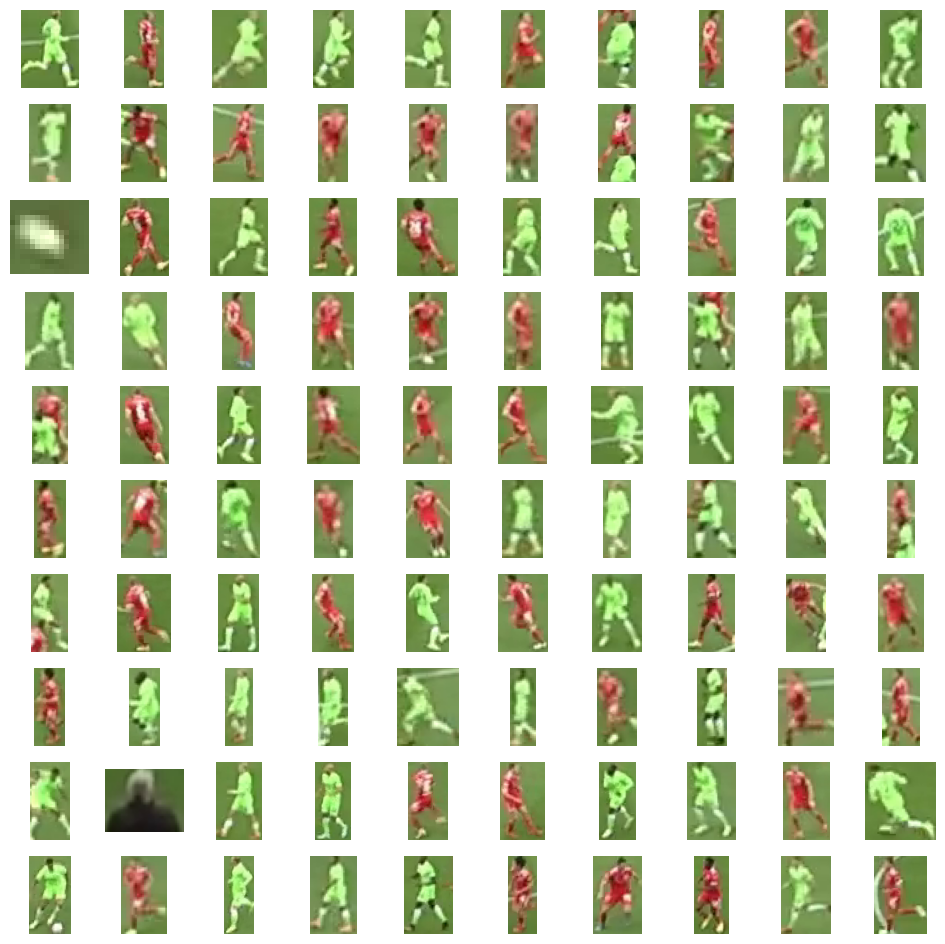

In [13]:
sv.plot_images_grid(crops[:100], grid_size=(10,10))

In [14]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [15]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []

with torch.no_grad():
    for batch in tqdm(batches, desc='embeddings extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors='pt').to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embeddings extraction: 16it [00:08,  1.94it/s]


In [16]:
data.shape

(501, 768)

In [17]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [18]:
projections = REDUCER.fit_transform(data)

In [19]:
projections.shape

(501, 3)

In [20]:
clusters = CLUSTERING_MODEL.fit_predict(projections)

In [21]:
clusters[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [22]:
team_0 = [
    crop
    for crop, cluster
    in zip(crops, clusters)
    if cluster ==0
]

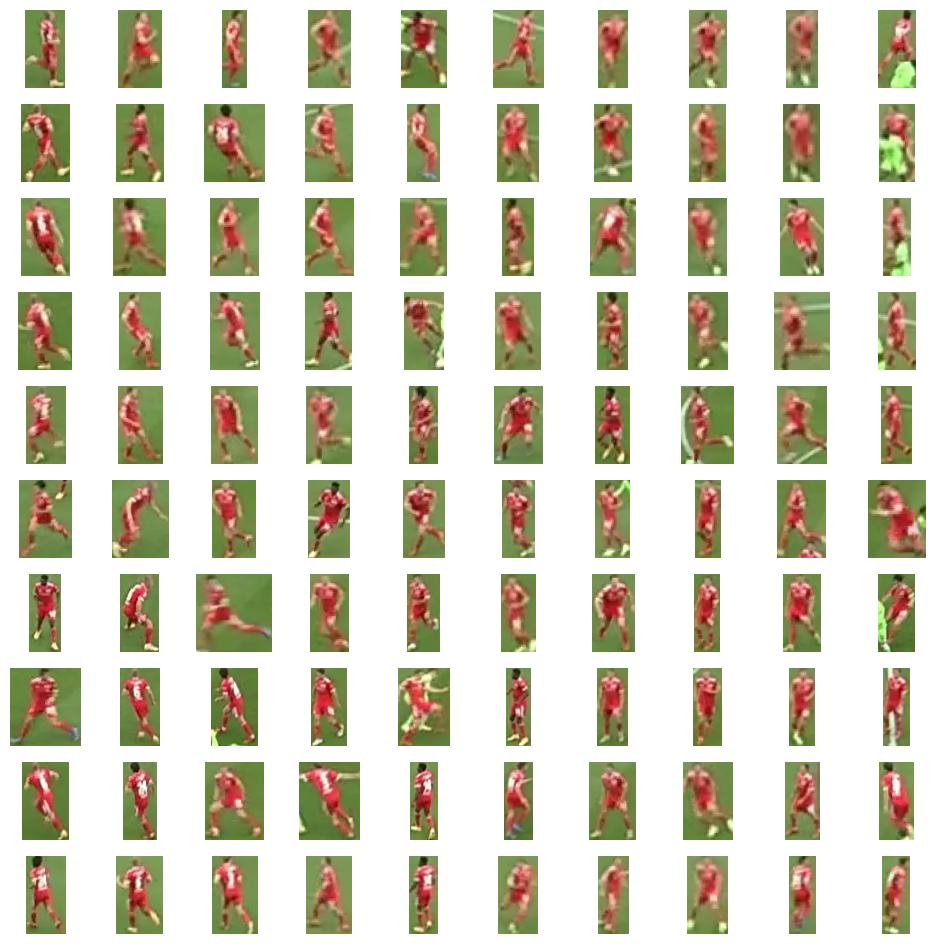

In [23]:
sv.plot_images_grid(team_0[:100], grid_size=(10, 10))

In [24]:
def resolve_goalkeepers_team_id(players_detections: sv.Detections,
                                goalkeepers_detections: sv.Detections
                                ):

  goalkeepers_xy = goalkeepers_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
  players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)

  team_0_centroid = players_xy[players_detections.class_id ==0].mean(axis=0)
  team_1_centroid = players_xy[players_detections.class_id ==1].mean(axis=0)

  goalkeepers_team_ids = []
  for goalkeeper_xy in goalkeepers_xy:
    dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
    dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
    goalkeepers_team_ids.append(0 if dist_0 < dist_1 else 1)

  return np.array(goalkeepers_team_ids)

collecting crops: 25it [00:19,  1.29it/s]
Embedding extraction: 16it [00:07,  2.14it/s]
Embedding extraction: 1it [00:00,  2.72it/s]


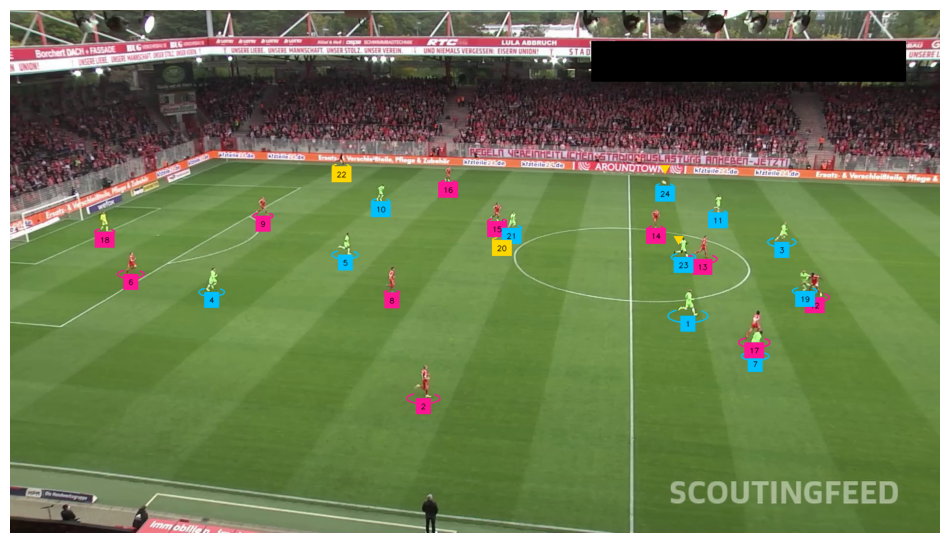

In [25]:
from tqdm import tqdm
from sports.common.team import TeamClassifier


SOURCE_VIDEO_PATH = f"{DATA_dir}/121364_0.mp4"
TARGET_VIDEO_PATH = f"{DATA_dir}/121364_0_results_15.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

ellipse_annotator = sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness = 2
)

label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

      result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      detections = sv.Detections.from_inference(result)

      ball_detections = detections[detections.class_id == BALL_ID]
      ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

      all_detections = detections[detections.class_id != BALL_ID]
      all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
      all_detections = tracker.update_with_detections(all_detections)

      players_detections = all_detections[all_detections.class_id == PLAYER_ID]
      goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
      referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

      players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
      players_detections.class_id = team_classifier.predict(players_crops)

      goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
          players_detections, goalkeepers_detections
        )

      referees_detections.class_id -= 1

      all_detections = sv.Detections.merge([players_detections, goalkeepers_detections, referees_detections])
      all_detections.class_id = all_detections.class_id.astype(int) # added this to ensure all_detections were integers


      labels = [
          f"{tracker_id}"
          for tracker_id
          in all_detections.tracker_id
          ]

      annotated_frame = frame.copy()
      annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
      annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
      annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

      video_sink.write_frame(annotated_frame)

sv.plot_image(annotated_frame)

# Pitch Keypoint Detection

In [26]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get("ROBOFLOW_API_KEY")


PITCH_DETECTION_MODEL_ID = "football-field-detection-f07vi/15"
PITCH_DETECTION_MODEL = get_model(PITCH_DETECTION_MODEL_ID, ROBOFLOW_API_KEY)

100%|█████████▉| 749/750 [03:22<00:00,  3.69it/s]


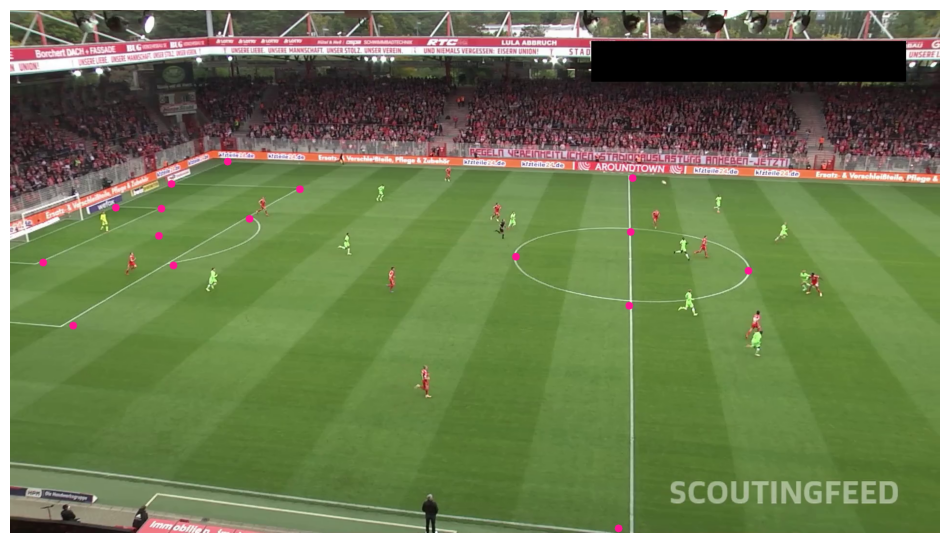

In [28]:
# Key points detection

SOURCE_VIDEO_PATH = f"{DATA_dir}/121364_0.mp4"
TARGET_VIDEO_PATH = f"{DATA_dir}/121364_0_key_points.mp4"

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

      vertex_annotator = sv.VertexAnnotator(
          color=sv.Color.from_hex('#ff1493'),
          radius=8
      )

      frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
      frame = next(frame_generator)

      result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      key_points = sv.KeyPoints.from_inference(result)

      filter = key_points.confidence[0] > 0.5
      frame_reference_points = key_points.xy[0][filter]
      frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])

      annotated_frame = frame.copy()
      annotated_frame = vertex_annotator.annotate(annotated_frame, frame_reference_key_points)

      video_sink.write_frame(annotated_frame)

sv.plot_image(annotated_frame)

In [29]:
key_points.confidence[0]

array([9.8090553e-01, 9.7553080e-01, 9.0071672e-01, 3.2666999e-01,
       2.0872533e-02, 6.3130260e-03, 9.7069061e-01, 6.0160899e-01,
       9.6919614e-01, 9.9790657e-01, 9.9639565e-01, 9.8214918e-01,
       7.3029882e-01, 9.9344903e-01, 9.9641412e-01, 9.9738342e-01,
       7.0346808e-01, 1.9716799e-02, 6.8688989e-03, 1.1081100e-03,
       4.8518181e-05, 9.9521875e-04, 1.1269450e-03, 2.1100044e-05,
       3.4341216e-03, 1.2004375e-03, 3.2091141e-04, 9.4175339e-06,
       4.5299530e-06, 3.5285950e-05, 9.9951589e-01, 9.5350838e-01],
      dtype=float32)

Project Pitch Lines on Frame

In [30]:
from sports.configs.soccer import SoccerPitchConfiguration

CONFIG = SoccerPitchConfiguration()

In [31]:
CONFIG.vertices

[(0, 0),
 (0, 1450.0),
 (0, 2584.0),
 (0, 4416.0),
 (0, 5550.0),
 (0, 7000),
 (550, 2584.0),
 (550, 4416.0),
 (1100, 3500.0),
 (2015, 1450.0),
 (2015, 2584.0),
 (2015, 4416.0),
 (2015, 5550.0),
 (6000.0, 0),
 (6000.0, 2585.0),
 (6000.0, 4415.0),
 (6000.0, 7000),
 (9985, 1450.0),
 (9985, 2584.0),
 (9985, 4416.0),
 (9985, 5550.0),
 (10900, 3500.0),
 (11450, 2584.0),
 (11450, 4416.0),
 (12000, 0),
 (12000, 1450.0),
 (12000, 2584.0),
 (12000, 4416.0),
 (12000, 5550.0),
 (12000, 7000),
 (5085.0, 3500.0),
 (6915.0, 3500.0)]

In [32]:
CONFIG.edges

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (7, 8),
 (10, 11),
 (11, 12),
 (12, 13),
 (14, 15),
 (15, 16),
 (16, 17),
 (18, 19),
 (19, 20),
 (20, 21),
 (23, 24),
 (25, 26),
 (26, 27),
 (27, 28),
 (28, 29),
 (29, 30),
 (1, 14),
 (2, 10),
 (3, 7),
 (4, 8),
 (5, 13),
 (6, 17),
 (14, 25),
 (18, 26),
 (23, 27),
 (24, 28),
 (21, 29),
 (17, 30)]

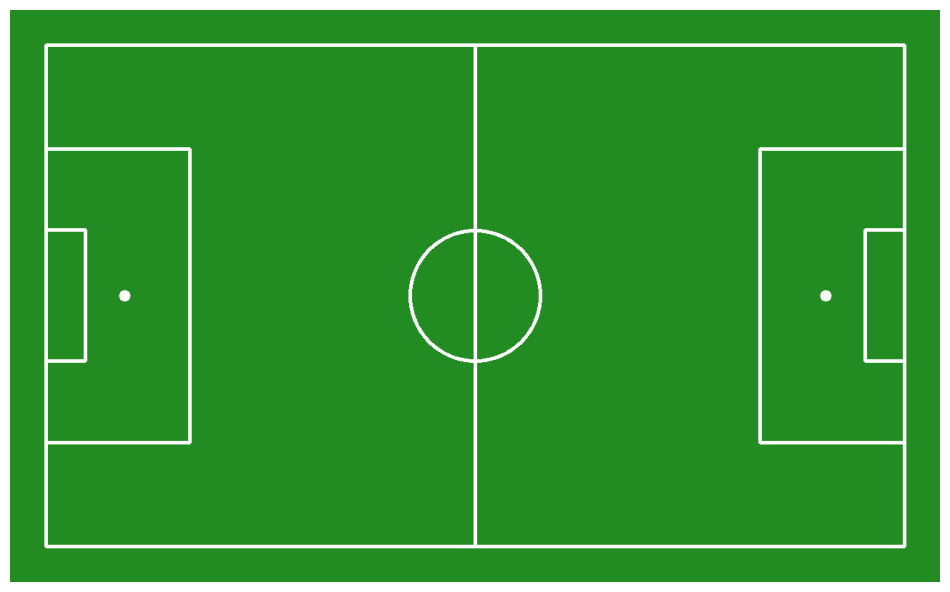

In [33]:
from sports.annotators.soccer import draw_pitch

annotated_frame = draw_pitch(CONFIG)

sv.plot_image(annotated_frame)

In [34]:
import cv2
class ViewTransformer:

  def __init__(self, source: np.ndarray, target: np.ndarray):
    source = source.astype(np.float32)
    target = target.astype(np.float32)
    self.m, _m= cv2.findHomography(source, target)

  def transform_points(self, points: np.ndarray) -> np.ndarray:
    points = points.reshape(-1, 1, 2).astype(np.float32)
    points = cv2.perspectiveTransform(points, self.m)
    return points.reshape(-1, 2).astype(np.float32)

100%|█████████▉| 749/750 [02:12<00:00,  5.67it/s]


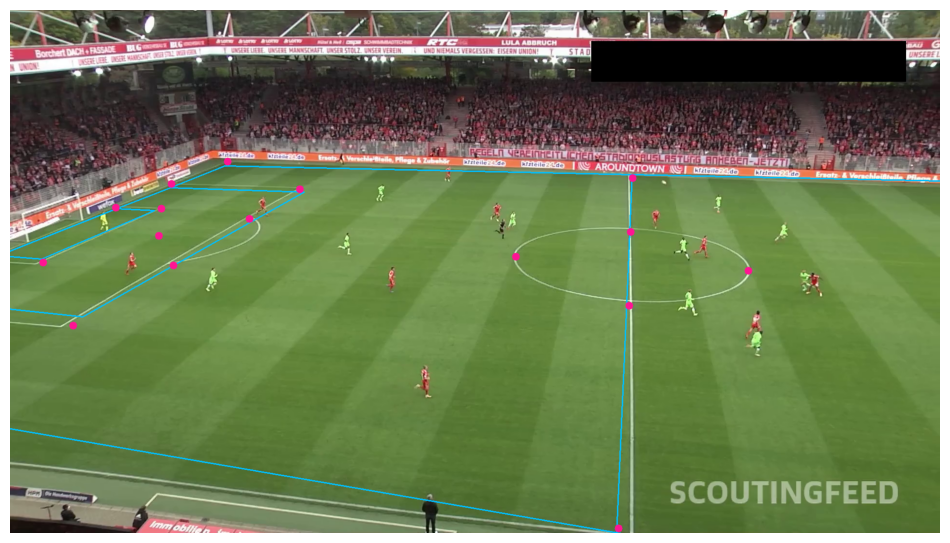

In [37]:
# key points with lines

SOURCE_VIDEO_PATH = f"{DATA_dir}/121364_0.mp4"
TARGET_VIDEO_PATH = f"{DATA_dir}/121364_0_key_points_lines.mp4"

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

      vertex_annotator = sv.VertexAnnotator(
          color=sv.Color.from_hex('#ff1493'),
          radius=8
      )

      edge_annotator = sv.EdgeAnnotator(
          color=sv.Color.from_hex('#00BFFF'),
          thickness=2,
          edges=CONFIG.edges
      )

      frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
      frame = next(frame_generator)

      result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      key_points = sv.KeyPoints.from_inference(result)

      filter = key_points.confidence[0] > 0.5
      frame_reference_points = key_points.xy[0][filter]
      frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])
      pitch_reference_points = np.array(CONFIG.vertices)[filter]

      view_transformer = ViewTransformer(
          source=pitch_reference_points,
          target=frame_reference_points
      )

      pitch_all_points = np.array(CONFIG.vertices)
      frame_all_points = view_transformer.transform_points(pitch_all_points)
      frame_all_key_points = sv.KeyPoints(xy=frame_all_points[np.newaxis, ...])

      annotated_frame = frame.copy()
      annotated_frame = edge_annotator.annotate(annotated_frame, frame_all_key_points)
      annotated_frame = vertex_annotator.annotate(annotated_frame, frame_reference_key_points)

      video_sink.write_frame(annotated_frame)

sv.plot_image(annotated_frame)

In [42]:
import cv2
import numpy as np

# this fixes the next code. its for situations where no ball is detected
class ViewTransformer:

  def __init__(self, source: np.ndarray, target: np.ndarray):
    source = source.astype(np.float32)
    target = target.astype(np.float32)
    self.m, _ = cv2.findHomography(source, target)

  def transform_points(self, points: np.ndarray) -> np.ndarray:
    if points.size == 0: # Handle empty points array gracefully
        return np.array([], dtype=np.float32).reshape(-1, 2)
    points = points.reshape(-1, 1, 2).astype(np.float32)
    transformed_points = cv2.perspectiveTransform(points, self.m)
    # It's also possible for cv2.perspectiveTransform to return None if self.m is invalid
    if transformed_points is None:
        return np.array([], dtype=np.float32).reshape(-1, 2)
    return transformed_points.reshape(-1, 2).astype(np.float32)

collecting crops: 25it [00:09,  2.57it/s]
Embedding extraction: 16it [00:06,  2.43it/s]
  0%|          | 0/750 [00:00<?, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.86it/s]
  0%|          | 1/750 [00:00<06:37,  1.88it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
  0%|          | 2/750 [00:00<06:04,  2.05it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.87it/s]
  0%|          | 3/750 [00:01<05:59,  2.08it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.90it/s]
  1%|          | 4/750 [00:01<05:52,  2.11it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
  1%|          | 5/750 [00:02<05:48,  2.14it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.92it/s]
  1%|          | 6/750 [00:02<05:45,  2.15it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [

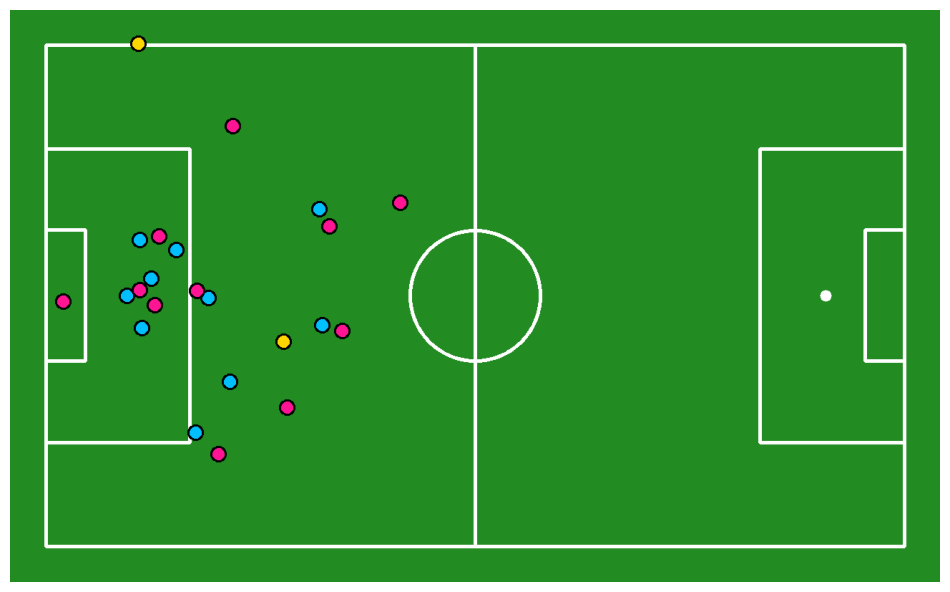

In [46]:
# transforming points from camera view into pitch perspective

from sports.annotators.soccer import draw_pitch, draw_points_on_pitch


SOURCE_VIDEO_PATH = f"{DATA_dir}/121364_0.mp4"
TARGET_VIDEO_PATH = f"{DATA_dir}/121364_0_2d_map.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
#frame = next(frame_generator)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

      result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      detections = sv.Detections.from_inference(result)

      ball_detections = detections[detections.class_id == BALL_ID]
      ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

      all_detections = detections[detections.class_id != BALL_ID]
      all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
      all_detections = tracker.update_with_detections(all_detections)

      players_detections = all_detections[all_detections.class_id == PLAYER_ID]
      goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
      referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

      players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
      players_detections.class_id = team_classifier.predict(players_crops)

      goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
          players_detections, goalkeepers_detections
        )

      result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      key_points = sv.KeyPoints.from_inference(result)

      filter = key_points.confidence[0] > 0.5
      frame_reference_points = key_points.xy[0][filter]
      frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])
      pitch_reference_points = np.array(CONFIG.vertices)[filter]

      view_transformer = ViewTransformer(
          source=frame_reference_points,
          target=pitch_reference_points
      )

      frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_ball_xy = view_transformer.transform_points(frame_ball_xy)

      frame_players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_players_xy = view_transformer.transform_points(frame_players_xy)

      frame_referees_xy = referees_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_referees_xy = view_transformer.transform_points(frame_referees_xy)

      pitch= draw_pitch(config=CONFIG)
      pitch = draw_points_on_pitch(
          config=CONFIG,
          xy=pitch_ball_xy,
          face_color=sv.Color.WHITE,
          edge_color=sv.Color.BLACK,
          radius=10,
          pitch=pitch
      )

      pitch = draw_points_on_pitch(
          config=CONFIG,
          xy=pitch_players_xy[players_detections.class_id == 0],
          face_color=sv.Color.from_hex("00BFFF"),
          edge_color=sv.Color.BLACK,
          radius=10,
          pitch=pitch
      )

      pitch = draw_points_on_pitch(
          config=CONFIG,
          xy=pitch_players_xy[players_detections.class_id == 1],
          face_color=sv.Color.from_hex("FF1493"),
          edge_color=sv.Color.BLACK,
          radius=10,
          pitch=pitch
      )

      pitch = draw_points_on_pitch(
          config=CONFIG,
          xy=pitch_referees_xy,
          face_color=sv.Color.from_hex("FFD700"),
          edge_color=sv.Color.BLACK,
          radius=10,
          pitch=pitch
      )

      #video_sink.write_frame(pitch)
      pitch_resized = cv2.resize(pitch, (frame.shape[1], frame.shape[0]))
      video_sink.write_frame(pitch_resized)

sv.plot_image(pitch)

In [45]:
print(frame.shape, pitch.shape)

(1080, 1920, 3) (800, 1300, 3)


collecting crops: 25it [00:10,  2.31it/s]
Embedding extraction: 16it [00:06,  2.38it/s]
  0%|          | 0/750 [00:00<?, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.25it/s]
  0%|          | 1/750 [00:01<13:07,  1.05s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.85it/s]
  0%|          | 2/750 [00:01<11:21,  1.10it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.89it/s]
  0%|          | 3/750 [00:02<10:35,  1.17it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.81it/s]
  1%|          | 4/750 [00:03<10:14,  1.21it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.14it/s]
  1%|          | 5/750 [00:04<09:55,  1.25it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.15it/s]
  1%|          | 6/750 [00:04<09:45,  1.27it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [

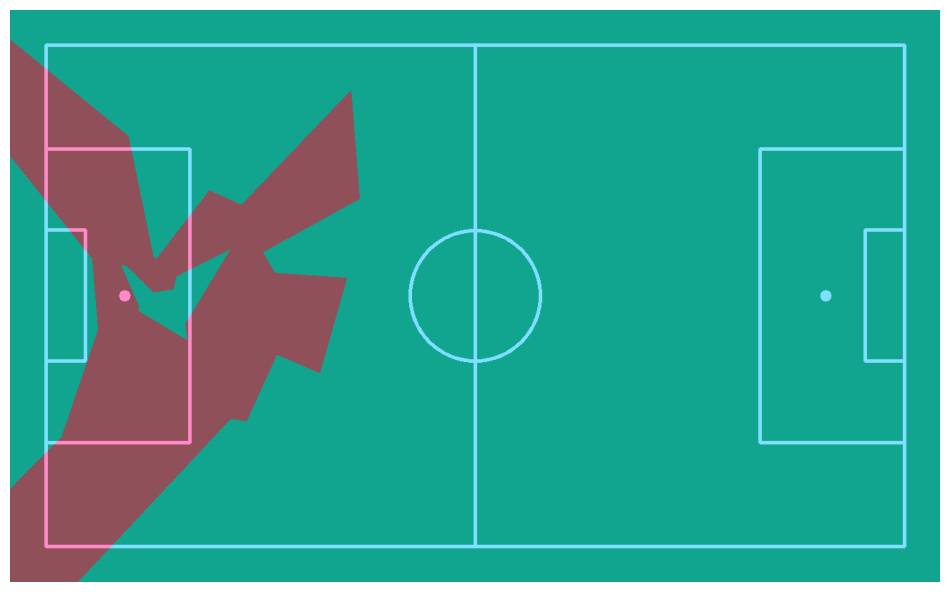

In [47]:
# Voronoi_diagram

from sports.annotators.soccer import draw_pitch, draw_points_on_pitch, draw_pitch_voronoi_diagram


SOURCE_VIDEO_PATH = f"{DATA_dir}/121364_0.mp4"
TARGET_VIDEO_PATH = f"{DATA_dir}/121364_0_voronoi.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):

      result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      detections = sv.Detections.from_inference(result)

      ball_detections = detections[detections.class_id == BALL_ID]
      ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

      all_detections = detections[detections.class_id != BALL_ID]
      all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
      all_detections = tracker.update_with_detections(all_detections)

      players_detections = all_detections[all_detections.class_id == PLAYER_ID]
      goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
      referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

      players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
      players_detections.class_id = team_classifier.predict(players_crops)

      goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
          players_detections, goalkeepers_detections
        )

      result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      key_points = sv.KeyPoints.from_inference(result)

      filter = key_points.confidence[0] > 0.5
      frame_reference_points = key_points.xy[0][filter]
      frame_reference_key_points = sv.KeyPoints(xy=frame_reference_points[np.newaxis, ...])
      pitch_reference_points = np.array(CONFIG.vertices)[filter]

      view_transformer = ViewTransformer(
          source=frame_reference_points,
          target=pitch_reference_points
      )

      frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_ball_xy = view_transformer.transform_points(frame_ball_xy)

      frame_players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_players_xy = view_transformer.transform_points(frame_players_xy)

      frame_referees_xy = referees_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      pitch_referees_xy = view_transformer.transform_points(frame_referees_xy)

      pitch= draw_pitch(config=CONFIG)
      # pitch = draw_points_on_pitch(
      #     config=CONFIG,
      #     xy=pitch_ball_xy,
      #     face_color=sv.Color.WHITE,
      #     edge_color=sv.Color.BLACK,
      #     radius=10,
      #     pitch=pitch
      # )

      # pitch = draw_points_on_pitch(
      #     config=CONFIG,
      #     xy=pitch_players_xy[players_detections.class_id == 0],
      #     face_color=sv.Color.from_hex("00BFFF"),
      #     edge_color=sv.Color.BLACK,
      #     radius=10,
      #     pitch=pitch
      # )

      # pitch = draw_points_on_pitch(
      #     config=CONFIG,
      #     xy=pitch_players_xy[players_detections.class_id == 1],
      #     face_color=sv.Color.from_hex("FF1493"),
      #     edge_color=sv.Color.BLACK,
      #     radius=10,
      #     pitch=pitch
      # )

      # pitch = draw_points_on_pitch(
      #     config=CONFIG,
      #     xy=pitch_referees_xy,
      #     face_color=sv.Color.from_hex("FFD700"),
      #     edge_color=sv.Color.BLACK,
      #     radius=10,
      #     pitch=pitch
      # )

      pitch = draw_pitch_voronoi_diagram(
          config=CONFIG,
          team_1_xy=pitch_players_xy[players_detections.class_id == 0],
          team_2_xy=pitch_players_xy[players_detections.class_id == 1],
          team_1_color=sv.Color.from_hex("00BFFF"),
          team_2_color=sv.Color.from_hex("FF1493"),
          pitch=pitch
      )

      #video_sink.write_frame(pitch)
      pitch_resized = cv2.resize(pitch, (frame.shape[1], frame.shape[0]))
      video_sink.write_frame(pitch_resized)

sv.plot_image(pitch)

In [ ]:
# Ball trackectory analysis

from collections import deque

SOURCE_VIDEO_PATH = f"{DATA_dir}/121364_0.mp4"
TARGET_VIDEO_PATH = f"{DATA_dir}/121364_0_results_7.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

MAXLEN = 5
homography_matrices_buffer = deque(maxlen=MAXLEN) # Renamed M for clarity
path_raw = []

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Store the last successfully computed homography matrix
last_valid_homography_matrix = None

# A helper function to transform points using a given homography matrix
def transform_points_with_matrix(points: np.ndarray, m: np.ndarray) -> np.ndarray:
    if points.size == 0: # Handle empty points array gracefully
        return np.array([], dtype=np.float32).reshape(-1, 2)
    points = points.reshape(-1, 1, 2).astype(np.float32)
    transformed_points = cv2.perspectiveTransform(points, m)
    # cv2.perspectiveTransform might return None if m is invalid, though we are checking for m validity
    if transformed_points is None:
        return np.array([], dtype=np.float32).reshape(-1, 2)
    return transformed_points.reshape(-1, 2).astype(np.float32)


for frame in tqdm(frame_generator, total=video_info.total_frames):

      result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      detections = sv.Detections.from_inference(result)

      ball_detections = detections[detections.class_id == BALL_ID]
      # If no ball is detected, append None to path_raw and continue
      if len(ball_detections) == 0:
          path_raw.append(None)
          continue

      ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

      result = PITCH_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
      key_points = sv.KeyPoints.from_inference(result)

      filter_mask = key_points.confidence[0] > 0.5
      frame_reference_points = key_points.xy[0][filter_mask]
      pitch_reference_points = np.array(CONFIG.vertices)[filter_mask]

      current_homography_matrix = None
      # Check if enough points are available to compute homography (at least 4)
      if len(frame_reference_points) >= 4 and len(pitch_reference_points) >= 4:
          temp_m, _ = cv2.findHomography(frame_reference_points.astype(np.float32), pitch_reference_points.astype(np.float32))
          if temp_m is not None:
              current_homography_matrix = temp_m

      # Decide which homography matrix to use for this frame
      homography_to_use = None
      if current_homography_matrix is not None:
          homography_matrices_buffer.append(current_homography_matrix)
          last_valid_homography_matrix = current_homography_matrix # Update last valid one

      if len(homography_matrices_buffer) > 0:
          # Use the mean of the buffered homography matrices
          homography_to_use = np.mean(np.array(list(homography_matrices_buffer)), axis=0)
      elif last_valid_homography_matrix is not None:
          # If buffer is empty but we have a last valid one, use it
          homography_to_use = last_valid_homography_matrix

      # If we still don't have a valid homography matrix, skip this frame
      if homography_to_use is None:
          path_raw.append(None)
          continue

      frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
      # Use the helper function with the chosen homography matrix
      pitch_ball_xy = transform_points_with_matrix(points=frame_ball_xy, m=homography_to_use)

      path_raw.append(pitch_ball_xy)

In [ ]:
path_raw

In [ ]:
path = [
    np.empty((0, 2), dtype=np.float32) if coorinates.shape[0] >= 2 else coorinates
             for coorinates
             in path_raw
             if coorinates is not None
]

path = [coorinates.flatten() for coorinates in path]

In [ ]:
from sports.annotators.soccer import draw_paths_on_pitch

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[path],
    color=sv.Color.WHITE,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)